# Data Cleaning + Analysis, Feature Engineering

Welcome back to the `Balling with Data` project, as we get underway into analyzing the data we've just extracted from the `sportsreference` package! Let's get right into it.

In [1]:
# Standard imports
# If any of these don't work, try doing `pip install _____`, or try looking up the error message.
import numpy as np
import pandas as pd
import json
import time
import os.path
from os import path
import math
import datetime
import unidecode
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Table of Contents

# Let's Get Cleaning!

In order for us to get into the heavy-lifting of the project (the predicting), we have to know what our data is composed of beforehand, otherwise we'll be predicting blindly. So, let's take a look at our dataset and see if there's anything interesting that we end up finding!

In [2]:
data = pd.read_csv("data/all_player_data.csv")
data.head()

,Unnamed: 0,name,NBA_and_ones,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocking_fouls,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,...,NCAAB_true_shooting_percentage,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes
0,0,Landry Fields,NaN,9.0,155.0,0.5,NaN,17.0,0.6,0,...,0.560,11.7,83.0,420.0,0.521,219.0,31.5,215,6.0,0.206
1,1,Andy Rautins,NaN,18.7,3.0,0.0,NaN,0.0,-16.0,0,...,0.632,22.6,98.0,56.0,0.571,32.0,18.4,195,4.9,0.173
2,2,Patrick Patterson,NaN,7.6,41.0,3.0,NaN,37.0,0.5,0,...,0.624,8.6,41.0,305.0,0.626,191.0,18.0,235,7.0,0.223
3,3,Gani Lawal,NaN,0.0,0.0,0.0,NaN,0.0,-4.9,0,...,0.547,15.3,78.0,324.0,0.531,172.0,26.1,234,4.1,0.177
4,4,Cole Aldrich,NaN,4.0,4.0,3.6,NaN,7.0,-0.8,0,...,0.596,14.1,56.0,265.0,0.562,149.0,19.9,245,5.9,0.245


In [3]:
# Setting name column to index
data.set_index('name', inplace=True)
data.head()

,Unnamed: 0,NBA_and_ones,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocking_fouls,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,...,NCAAB_true_shooting_percentage,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes
name,,,,,,,,,,,,,,,,,,,,,
Landry Fields,0,NaN,9.0,155.0,0.5,NaN,17.0,0.6,0,0.1,...,0.560,11.7,83.0,420.0,0.521,219.0,31.5,215,6.0,0.206
Andy Rautins,1,NaN,18.7,3.0,0.0,NaN,0.0,-16.0,0,-4.3,...,0.632,22.6,98.0,56.0,0.571,32.0,18.4,195,4.9,0.173
Patrick Patterson,2,NaN,7.6,41.0,3.0,NaN,37.0,0.5,0,0.5,...,0.624,8.6,41.0,305.0,0.626,191.0,18.0,235,7.0,0.223
Gani Lawal,3,NaN,0.0,0.0,0.0,NaN,0.0,-4.9,0,0.5,...,0.547,15.3,78.0,324.0,0.531,172.0,26.1,234,4.1,0.177
Cole Aldrich,4,NaN,4.0,4.0,3.6,NaN,7.0,-0.8,0,2.6,...,0.596,14.1,56.0,265.0,0.562,149.0,19.9,245,5.9,0.245


First, let's clean up our dataset. As you can see, there's clearly some `NaN` values and a random `Unnamed: 0` column, both of which won't do for our models (imagine doing linear algebra on values that don't exist, what happens?). Let's take care of them.

**Aside**: `NaN`, with respect to data, means "Not A Number", implying that this value is not a number/might not exist. Typically, fi this value were to not be a number, it could take the form of a categorical variable, so in many cases, when you see a `NaN` value, you can treat it as a missing value in our dataset.

In [4]:
# We can use the .drop method to drop the erroneous 'Unnamed: 0' column
# Don't run this over and over because you'll run into an error of
# trying to delete a column that doesn't exist (we set inplace=True)
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,NBA_and_ones,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocking_fouls,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,...,NCAAB_true_shooting_percentage,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes
name,,,,,,,,,,,,,,,,,,,,,
Landry Fields,NaN,9.0,155.0,0.5,NaN,17.0,0.6,0,0.1,18.9,...,0.560,11.7,83.0,420.0,0.521,219.0,31.5,215,6.0,0.206
Andy Rautins,NaN,18.7,3.0,0.0,NaN,0.0,-16.0,0,-4.3,4.8,...,0.632,22.6,98.0,56.0,0.571,32.0,18.4,195,4.9,0.173
Patrick Patterson,NaN,7.6,41.0,3.0,NaN,37.0,0.5,0,0.5,14.9,...,0.624,8.6,41.0,305.0,0.626,191.0,18.0,235,7.0,0.223
Gani Lawal,NaN,0.0,0.0,0.0,NaN,0.0,-4.9,0,0.5,0.0,...,0.547,15.3,78.0,324.0,0.531,172.0,26.1,234,4.1,0.177
Cole Aldrich,NaN,4.0,4.0,3.6,NaN,7.0,-0.8,0,2.6,17.5,...,0.596,14.1,56.0,265.0,0.562,149.0,19.9,245,5.9,0.245


In [5]:
# Find all the columns with NaN values in them
nan_col = data.columns[data.isna().any()].tolist()
nan_col

['NBA_and_ones',
 'NBA_blocking_fouls',
 'NBA_effective_field_goal_percentage',
 'NBA_field_goal_perc_sixteen_foot_plus_two_pointers',
 'NBA_field_goal_perc_ten_to_sixteen_feet',
 'NBA_field_goal_perc_three_to_ten_feet',
 'NBA_field_goal_perc_zero_to_three_feet',
 'NBA_field_goal_percentage',
 'NBA_free_throw_attempt_rate',
 'NBA_free_throw_percentage',
 'NBA_lost_ball_turnovers',
 'NBA_net_plus_minus',
 'NBA_offensive_fouls',
 'NBA_on_court_plus_minus',
 'NBA_other_turnovers',
 'NBA_passing_turnovers',
 'NBA_percentage_field_goals_as_dunks',
 'NBA_percentage_of_three_pointers_from_corner',
 'NBA_percentage_shots_three_pointers',
 'NBA_percentage_shots_two_pointers',
 'NBA_percentage_sixteen_foot_plus_two_pointers',
 'NBA_percentage_ten_to_sixteen_footers',
 'NBA_percentage_three_to_ten_footers',
 'NBA_percentage_zero_to_three_footers',
 'NBA_points_generated_by_assists',
 'NBA_position',
 'NBA_salary',
 'NBA_shooting_distance',
 'NBA_shooting_fouls',
 'NBA_shooting_fouls_drawn',
 'NBA

Now, let's take a look at the dataset with all the `NaN` values and how many `NaN` values exist in each feature.

In [6]:
data[nan_col].head()

,NBA_and_ones,NBA_blocking_fouls,NBA_effective_field_goal_percentage,NBA_field_goal_perc_sixteen_foot_plus_two_pointers,NBA_field_goal_perc_ten_to_sixteen_feet,NBA_field_goal_perc_three_to_ten_feet,NBA_field_goal_perc_zero_to_three_feet,NBA_field_goal_percentage,NBA_free_throw_attempt_rate,NBA_free_throw_percentage,...,NBA_three_pointers_assisted_percentage,NBA_true_shooting_percentage,NBA_turnover_percentage,NBA_two_point_percentage,NBA_two_pointers_assisted_percentage,NCAAB_box_plus_minus,NCAAB_defensive_box_plus_minus,NCAAB_offensive_box_plus_minus,NCAAB_player_efficiency_rating,NCAAB_three_point_percentage
name,,,,,,,,,,,,,,,,,,,,,
Landry Fields,NaN,NaN,0.568,0.433,0.318,0.297,0.729,0.497,0.244,0.769,...,1.0,0.598,13.8,0.556,0.582,NaN,NaN,NaN,NaN,0.337
Andy Rautins,NaN,NaN,0.500,1.000,NaN,NaN,0.000,0.429,0.286,0.500,...,1.0,0.508,47.0,0.667,1.000,NaN,NaN,NaN,NaN,0.407
Patrick Patterson,NaN,NaN,0.558,0.524,0.490,0.490,0.687,0.558,0.157,0.714,...,NaN,0.574,9.8,0.562,0.711,NaN,NaN,NaN,NaN,0.348
Gani Lawal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
Cole Aldrich,NaN,NaN,0.533,NaN,NaN,0.222,1.000,0.533,0.267,0.500,...,NaN,0.537,32.3,0.533,0.375,NaN,NaN,NaN,NaN,NaN


In [7]:
# A way for us to see the number of NaN values for each column.
nan_cols_and_nums = data[nan_col].isnull().apply(sum)
nan_cols_and_nums

NBA_and_ones                                          532
NBA_blocking_fouls                                    532
NBA_effective_field_goal_percentage                     9
NBA_field_goal_perc_sixteen_foot_plus_two_pointers     66
NBA_field_goal_perc_ten_to_sixteen_feet                86
NBA_field_goal_perc_three_to_ten_feet                  54
NBA_field_goal_perc_zero_to_three_feet                 37
NBA_field_goal_percentage                               9
NBA_free_throw_attempt_rate                             9
NBA_free_throw_percentage                              64
NBA_lost_ball_turnovers                               532
NBA_net_plus_minus                                    532
NBA_offensive_fouls                                   532
NBA_on_court_plus_minus                               532
NBA_other_turnovers                                   532
NBA_passing_turnovers                                 532
NBA_percentage_field_goals_as_dunks                     9
NBA_percentage

As we can see from above, there are a lot of features with some values missing, or all values missing (532). In these cases, we can take a variety of different approaches to handling them so we can properly conduct our data analysis/modeling.

**We can do the following to take care of missing values**:
1. Replace values with a constant value
2. Replace values with a randomly selected value from the same feature
3. Replace values with the mean, median, or mode
4. Drop the row/column with the NaN value(s)

At this point, it's up to you for what kind of actions you'd like to perform to clean up these NaN columns from the data, but once you do so, assign it to `clean_data` to continue.

**Exercise:** Perform different `Pandas` actions/command in order to drop/fill-in the different `NaN` values in our dataset above! For some pointers on where to start, you might want to take a look at the `.drop` method for dataframes, or indexing into columns and how to apply different functions to them (to find mean, replace w/ constant, etc.). Check out [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) for more references on `Pandas` docoumentation/help, and feel free to ask us any questions-- we're here to help!

Once you've determined what to do with your data/changed your columns, set the final dataframe to `clean_data`, so we can use that variable later on as well!

### Cleaning Data Exercise

In [8]:
# Assign 'clean_data' to the clean dataset
clean_data = data.drop(columns=nan_col)
clean_data.head()

,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,NBA_defensive_win_shares,...,NCAAB_true_shooting_percentage,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes
name,,,,,,,,,,,,,,,,,,,,,
Landry Fields,9.0,155.0,0.5,17.0,0.6,0,0.1,18.9,416.0,1.8,...,0.560,11.7,83.0,420.0,0.521,219.0,31.5,215,6.0,0.206
Andy Rautins,18.7,3.0,0.0,0.0,-16.0,0,-4.3,4.8,1.0,0.0,...,0.632,22.6,98.0,56.0,0.571,32.0,18.4,195,4.9,0.173
Patrick Patterson,7.6,41.0,3.0,37.0,0.5,0,0.5,14.9,114.0,0.7,...,0.624,8.6,41.0,305.0,0.626,191.0,18.0,235,7.0,0.223
Gani Lawal,0.0,0.0,0.0,0.0,-4.9,0,0.5,0.0,0.0,0.0,...,0.547,15.3,78.0,324.0,0.531,172.0,26.1,234,4.1,0.177
Cole Aldrich,4.0,4.0,3.6,7.0,-0.8,0,2.6,17.5,22.0,0.2,...,0.596,14.1,56.0,265.0,0.562,149.0,19.9,245,5.9,0.245


Great! Now that our dataset has been cleaned, let's take a closer look into breaking down the column types. First, let's take a look at all the different columns with type `object`, or not an int/float.

In [9]:
# Finds all columns with qualitative values.
qual_col = clean_data.select_dtypes(['object']).columns.to_list()
qual_col

['NBA_height',
 'NBA_nationality',
 'NBA_player_id',
 'NBA_team_abbreviation',
 'NCAAB_conference',
 'NCAAB_height',
 'NCAAB_player_id',
 'NCAAB_position',
 'NCAAB_team_abbreviation']

In [10]:
clean_data[qual_col].head()

,NBA_height,NBA_nationality,NBA_player_id,NBA_team_abbreviation,NCAAB_conference,NCAAB_height,NCAAB_player_id,NCAAB_position,NCAAB_team_abbreviation
name,,,,,,,,,
Landry Fields,6-7,United States of America,fieldla01,NYK,pac-10,6-7,landry-fields-1,Guard,stanford
Andy Rautins,6-4,United States of America,rautian01,NYK,big-east,6-5,andy-rautins-1,Guard,syracuse
Patrick Patterson,6-8,United States of America,pattepa01,HOU,sec,6-9,patrick-patterson-1,Forward,kentucky
Gani Lawal,6-9,United States of America,lawalga01,PHO,acc,6-9,gani-lawal-1,Forward,georgia-tech
Cole Aldrich,6-11,United States of America,aldrico01,OKC,big-12,6-11,cole-aldrich-1,Center,kansas


From the table above, we can clearly see that some of the qualitative variables don't make too much sense to stick around/aren't important enough to keep (at least for purposes of this project). So, we can drop a few of these to help reduce the number of features we're dealing with in our dataset.

In [11]:
qual_drop = [
    'NBA_nationality',
    'NBA_player_id',
    'NBA_team_abbreviation',
    'NCAAB_conference', 
    'NBA_height', # we're going to assume height doesn't change much from NCAA to NBA
    'NCAAB_player_id',
    'NCAAB_team_abbreviation',
]

In [12]:
clean_data.drop(columns=qual_drop, inplace=True) # Only run this once

In [13]:
clean_data.head()

,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,NBA_defensive_win_shares,...,NCAAB_true_shooting_percentage,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes
name,,,,,,,,,,,,,,,,,,,,,
Landry Fields,9.0,155.0,0.5,17.0,0.6,0,0.1,18.9,416.0,1.8,...,0.560,11.7,83.0,420.0,0.521,219.0,31.5,215,6.0,0.206
Andy Rautins,18.7,3.0,0.0,0.0,-16.0,0,-4.3,4.8,1.0,0.0,...,0.632,22.6,98.0,56.0,0.571,32.0,18.4,195,4.9,0.173
Patrick Patterson,7.6,41.0,3.0,37.0,0.5,0,0.5,14.9,114.0,0.7,...,0.624,8.6,41.0,305.0,0.626,191.0,18.0,235,7.0,0.223
Gani Lawal,0.0,0.0,0.0,0.0,-4.9,0,0.5,0.0,0.0,0.0,...,0.547,15.3,78.0,324.0,0.531,172.0,26.1,234,4.1,0.177
Cole Aldrich,4.0,4.0,3.6,7.0,-0.8,0,2.6,17.5,22.0,0.2,...,0.596,14.1,56.0,265.0,0.562,149.0,19.9,245,5.9,0.245


One thing you might notice is we didn't drop the `NCAAB_height` or `NCAAB_position` columns. Now, this was deliberate, as we'll be able to clean those columns up even further to incorporate them into our modeling. We'll be able to translate these qualitative into different numerical columns, and better use them as key features for our models!

## Categorical to Numerical

Now, a key takeaway from this entire data analysis is that working with categorical variables is very tedious/ineffective. It's difficult to run regression with them, and tough for models to differentiate a "scaling" with them (what defines one category to be better than the other, if there is a differentiation?) So, what we aim to do with categorical variables is **turn them into numerical ones**, or try to remove them from the dataset. As you've seen above, we've already removed a decent few from the dataset, and now we'll try to convert these following ones that could be useful for our mdoel into numerical columns:

`NCAAB_height`
`NCAAB_position`

Now, with height, we can easily apply a function to convert the heights stored in strings into integers that we can actually use.

In [14]:
def convert_height(height: str) -> int:
    """
    Convert height from string to int (6-11 -> 83)
    """
    # TODO - remove later
    feet, inches = height.split("-")
    return int(feet) * 12 + int(inches)

In [15]:
clean_data['NCAAB_height'] = clean_data['NCAAB_height'].apply(convert_height) # Only run this once

In [16]:
clean_data.head()

,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,NBA_defensive_win_shares,...,NCAAB_true_shooting_percentage,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes
name,,,,,,,,,,,,,,,,,,,,,
Landry Fields,9.0,155.0,0.5,17.0,0.6,0,0.1,18.9,416.0,1.8,...,0.560,11.7,83.0,420.0,0.521,219.0,31.5,215,6.0,0.206
Andy Rautins,18.7,3.0,0.0,0.0,-16.0,0,-4.3,4.8,1.0,0.0,...,0.632,22.6,98.0,56.0,0.571,32.0,18.4,195,4.9,0.173
Patrick Patterson,7.6,41.0,3.0,37.0,0.5,0,0.5,14.9,114.0,0.7,...,0.624,8.6,41.0,305.0,0.626,191.0,18.0,235,7.0,0.223
Gani Lawal,0.0,0.0,0.0,0.0,-4.9,0,0.5,0.0,0.0,0.0,...,0.547,15.3,78.0,324.0,0.531,172.0,26.1,234,4.1,0.177
Cole Aldrich,4.0,4.0,3.6,7.0,-0.8,0,2.6,17.5,22.0,0.2,...,0.596,14.1,56.0,265.0,0.562,149.0,19.9,245,5.9,0.245


However, we'll see that the position column isn't so easy to convert. Let's take a look at it again.

In [17]:
# Each type in this category and the number of each type
clean_data['NCAAB_position'].value_counts()

Guard             262
Forward           229
Center             34
Guard-Forward       5
Center-Forward      1
Forward-Center      1
Name: NCAAB_position, dtype: int64

In [18]:
# Taking a look at all the types with a '-' in them, or looking at Guard-Forward, Forward-Center, and Center-Forward
clean_data[clean_data['NCAAB_position'].str.contains("-")][['NCAAB_position']]

,NCAAB_position
name,
Luke Kornet,Forward-Center
Jacob Evans,Guard-Forward
Kenrich Williams,Guard-Forward
Ángel Delgado,Center-Forward
Mikal Bridges,Guard-Forward
Duncan Robinson,Guard-Forward
Yuta Watanabe,Guard-Forward


**From this analysis, we can clearly see two things:**
1. There are many more Guards, Forwards, and Centers, than there are of the last 3 positions.
2. The different positions don't have any pre-defined order, so they don't necessarily follow any numerical standard. We could convert each position to its own respective number (0 -> Center, 1-> Center-Forward, ...), but that wouldn't make too much sense and could hurt model accuracy. For example, if we took the average of the column, the average might be 1 (which could correspond to Center-Forward), but we know that this might not be true because certain position types are weighted more than others.

Keeping these in mind, let's introduce a concept called **one-hot encoding** to try and help us with converting this column to a numerical type.

### One-Hot Encoding

**One-Hot Encoding** is a process we can follow to convert a categorical variable to a set of numerical ones (one for each possible type in the categorical variable), where each numerical variable is a `1` if the categorical variable was this type, and 0 otherwise. To make more sense of what this means, let's take a look at an example.

In [19]:
# Example data
ex_data = np.array([
    ['Blue', 'Bouncy', 5],
    ['Red', 'Not Bouncy', 3],
    ['Green', 'Medium Bouncy', 2],
    ['Red', 'Medium Bouncy', 6],
])
ex_df = pd.DataFrame(data=ex_data, columns=['Color', 'Bounciness', 'Diameter'])
ex_df

,Color,Bounciness,Diameter
0,Blue,Bouncy,5
1,Red,Not Bouncy,3
2,Green,Medium Bouncy,2
3,Red,Medium Bouncy,6


Now, let's say we're trying to predict how much a kid will like a certain bouncy ball given its color, bounciness, and diameter, and that the `Color` and `Bounciness` columns currently contain all the different possible values for their respective columns. We can see that color and bounciness are both categorical, making them difficult to use for modelling, but also a great use-case for **one-hot encoding**. So, let's apply it below with the helper method provided.

In [20]:
def one_hot_encoding(df, columns):
    """
    Converts given column names in df into one-hot encoded columns.
    Returns the given df dataframe with converted columns and removes the former ones included in `columns`
    """
    new_df = df.copy(deep=True)
    for col in columns:
        types = np.unique(new_df[col])
        for t in types:
            new_df[t] = (new_df[col] == t).apply(int)
    return new_df.drop(columns=columns)

In [21]:
one_hot_encoding(ex_df, columns=['Color', 'Bounciness'])

,Diameter,Blue,Green,Red,Bouncy,Medium Bouncy,Not Bouncy
0,5,1,0,0,1,0,0
1,3,0,0,1,0,0,1
2,2,0,1,0,0,1,0
3,6,0,0,1,0,1,0


As we can see, the `one_hot_encoding` method was able to remove the different categorical columns we provided, and replaced them with numerical columns, where they are a `1` or a `0` depending on whether or not that specific data point was or was not that category type beforehand. Now, we can use the numerical columns, and continue forward with our analysis!

**Why does this work?**

Now, if our models were to apply weights to different features, and say found that being `Blue` was a strong indicator of a kid liking the ball, then it'll be able to apply a strong weight to the `Blue` numerical column, without having to worry about the other categories.

**Quick Note:** As you can see, one-hot encoding may generate a lot of different features ontop of our dataset that might slow down computation/accuracy (especially if the category can only have two types, in which knowing if the datapoint is one type already tells us it's not the other). So, something we can do with our dataset is that because we know that there aren't many players with hyphened positions, we could *remove them* from the dataset, and then run our one-hot encoder. That way, we''ll be able to reduce the **sparsity** (columns with few useful data points), and reduce the number of features in our dataset, as these 3 new columns we'd generate would be mostly 0's anyways.

Now, knowing how one-hot encoding works and how we can ensure that it doesn't take over our dataset with sparsity/excessive complexity, let's apply it to `clean_data`!

**Exercise:** First, drop the columns with the hyphened positions.

In [22]:
# TODO

**Exercise:** Next, run `one_hot_encoding` on the position column (take a look at the method above for more reference).

In [23]:
# TODO

In [24]:
# Drop the columns with the hyphened positions.
clean_data.drop(index=clean_data[clean_data['NCAAB_position'].str.contains("-")].index, inplace=True) # Only run this once

In [25]:
# Let's confirm they got dropped
np.unique(clean_data['NCAAB_position'])

array(['Center', 'Forward', 'Guard'], dtype=object)

In [26]:
# Now run one_hot_encoding on the position column
clean_data = one_hot_encoding(clean_data, columns=['NCAAB_position'])
clean_data.head()

,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,NBA_defensive_win_shares,...,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes,Center,Forward,Guard
name,,,,,,,,,,,,,,,,,,,,,
Landry Fields,9.0,155.0,0.5,17.0,0.6,0,0.1,18.9,416.0,1.8,...,420.0,0.521,219.0,31.5,215,6.0,0.206,0,0,1
Andy Rautins,18.7,3.0,0.0,0.0,-16.0,0,-4.3,4.8,1.0,0.0,...,56.0,0.571,32.0,18.4,195,4.9,0.173,0,0,1
Patrick Patterson,7.6,41.0,3.0,37.0,0.5,0,0.5,14.9,114.0,0.7,...,305.0,0.626,191.0,18.0,235,7.0,0.223,0,1,0
Gani Lawal,0.0,0.0,0.0,0.0,-4.9,0,0.5,0.0,0.0,0.0,...,324.0,0.531,172.0,26.1,234,4.1,0.177,0,1,0
Cole Aldrich,4.0,4.0,3.6,7.0,-0.8,0,2.6,17.5,22.0,0.2,...,265.0,0.562,149.0,19.9,245,5.9,0.245,1,0,0


Now, if you scroll towards the end of the dataframe above, you'll be able to see the new columns `Center`, `Forward`, and `Guard`. Congrats! You've officially learned about **one-hot encoding**, how to apply it to a dataset, and its use and implications.

# Data Analysis

The next section we'll get into in this notebook is **data analysis**. What this section is about is being able to dive into the different trends within the data to see which features correlate with others, for better or for worse, or for us to see any interesting trends within our distribution. Usually, this section is a great way for us to use our **human intuition**, and see how we can make our models perform better based off of our own background knowledge. 

We can begin by taking a look at different trends/correlations within the data!

## Normalizing the Data

The first thing we will do before any data analysis is **normalize** the dataframe's columns. What this means is we will center each of the columns around $N(0, 1)$, or the normal distribution with mean of 0 and variance of 1. This way, we'll be better able to compare different columns together. Some columns could have really high values (points), and others could have really low values (blocks), and comparing them by their original scale might not make the most sense for different models (more weight on points than blocks). So, **normalizing** is a way for us to be able to better see different trends within the data while also ensuring that our data is in as unbiased of a format as possible for our models later on.

In [27]:
def normalize_df(df):
    """
    Standardizes all the columns in the given dataframe to N(0, 1).
    """
    from sklearn.preprocessing import StandardScaler
    
    new_df = df.copy(deep=True)
    sc = StandardScaler()
    cols = new_df.columns
    for col in cols:
        new_df[col] = pd.to_numeric(new_df[col])
        new_df[[col]] = sc.fit_transform(new_df[[col]]) # Standardize column
    return new_df

In [28]:
# Removing names for this section
da_df = normalize_df(clean_data.copy(deep=True))
da_df.head()

,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,NBA_defensive_win_shares,...,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes,Center,Forward,Guard
name,,,,,,,,,,,,,,,,,,,,,
Landry Fields,-0.210703,1.239006,-0.499713,0.263171,0.910230,0.0,0.406147,0.541738,3.638891,1.862735,...,1.886301,0.002970,1.769552,1.575298,0.085184,0.765839,0.503596,-0.263147,-0.879573,1.001907
Andy Rautins,0.817277,-0.563891,-0.744487,-0.631269,-2.076687,0.0,-1.174644,-1.005533,-0.792716,-0.755957,...,-2.261729,0.832435,-2.067063,-1.390027,-0.714133,0.103755,-0.188849,-0.263147,-0.879573,1.001907
Patrick Patterson,-0.359071,-0.113167,0.724159,1.315453,0.892237,0.0,0.549855,0.102796,0.413962,0.262423,...,0.575797,1.744846,1.195086,-1.480571,0.884501,1.367733,0.860310,-0.263147,1.136915,-0.998097
Gani Lawal,-1.164499,-0.599474,-0.744487,-0.631269,-0.079411,0.0,0.549855,-1.532264,-0.803395,-0.755957,...,0.792315,0.168863,0.805269,0.352950,0.844536,-0.377760,-0.104916,-0.263147,1.136915,-0.998097
Cole Aldrich,-0.740590,-0.552030,1.017888,-0.262970,0.658321,0.0,1.304323,0.388109,-0.568466,-0.464991,...,0.119969,0.683131,0.333386,-1.050486,1.284160,0.705649,1.321940,3.800155,-0.879573,-0.998097


Now that we've normalize the columns, let's start taking a look at some trends!

## Trend Analysis

Within data science, there are two major plotting libraries that we'll be going through today: `matplotlib` and `seaborn`. The two of these will most likely comprise of most visualizations you'll be doing in the near future, so it'll be good to get a good grasp on both of them!

In order to differentiate them for now, whenever you see `plt.__`, this will be a call to `matplotlib`'s data visualization library, and `sns.__` will be a reference to `seaborn`. We will be leaning towards using `seaborn` more often throughout this project due to its increasing functionality, but here's a few links for the pros/cons of using each, as well as some quick intro documentation for how to use each one!

[**Similarities and differences between seaborn and matplotlib**](https://analyticsindiamag.com/comparing-python-data-visualization-tools-matplotlib-vs-seaborn/)

[**Matplotlib Tutorial**](https://matplotlib.org/tutorials/introductory/pyplot.html)

[**Seaborn Tutorial**](https://seaborn.pydata.org/introduction.html)

Now, let's get into using them!

### Visualizations

For this part, we want you guys to make your own visualizations to dig a little deeper into the data! So, let's begin by introducing the structure behind making a few start visualizations, and then doing some exercises to help make the different plots.

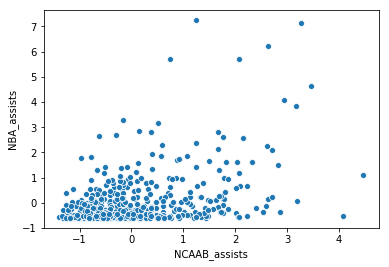

In [29]:
# Intro scatter plot
sns.scatterplot(da_df['NCAAB_assists'], da_df['NBA_assists']);

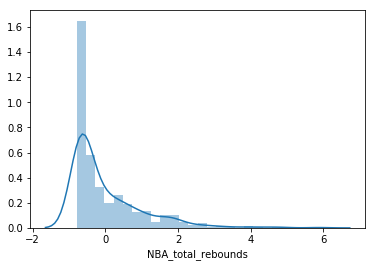

In [30]:
# Intro histogram
sns.distplot(da_df['NBA_total_rebounds']);

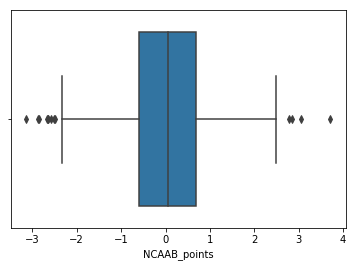

In [31]:
# Intro boxplot
sns.boxplot(da_df['NCAAB_points']);

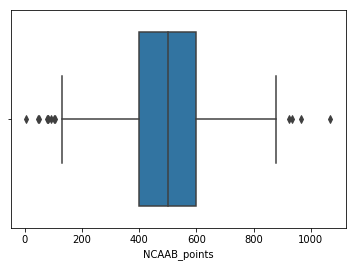

In [32]:
# You can bring in the clean_data to plot too! But the trend should still be the same.
sns.boxplot(clean_data['NCAAB_points']);

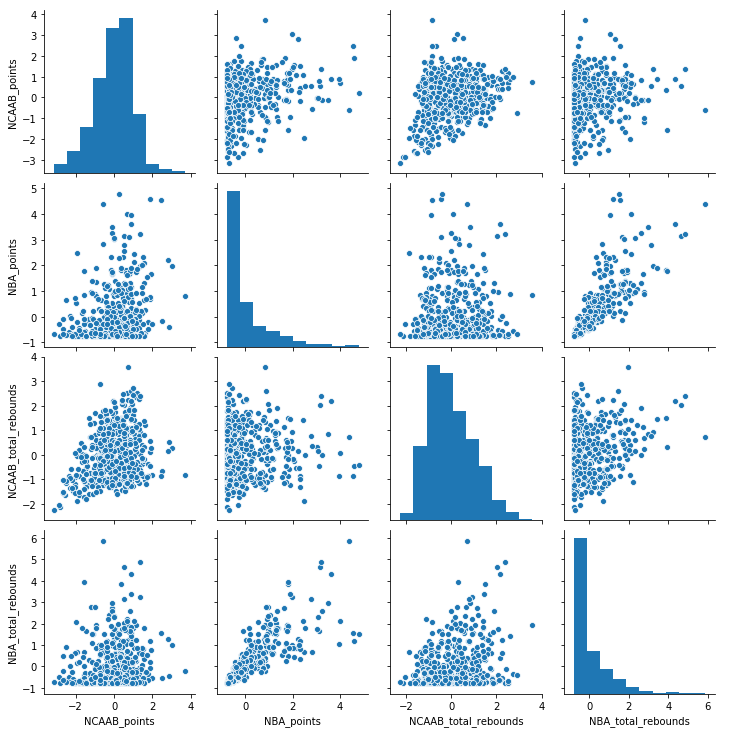

In [33]:
# Intro pairplot
# Look here for more info on what pairplots are: https://seaborn.pydata.org/generated/seaborn.pairplot.html
pairplot_cols = ['NCAAB_points', 'NBA_points', 'NCAAB_total_rebounds', 'NBA_total_rebounds']
sns.pairplot(da_df.loc[:, pairplot_cols]);

**Exercise:** Come up with 3 different types of plots that visualize either the correlation between different features, or the distribution of a feature itself! This'll be especially useful for later when we model, so that we already have some intuition behind which features to include in the model.

In [34]:
# TODO

## Correlation Matrix

One of the best ways to analyze our data is to construct a correlation matrix, so that we can see which features are negatively/positively/not correlated with each other. Let's go construct one!

Now that we've standardized all the columns, let's make the correlation matrix, and visualize it!

In [35]:
corr = da_df.corr()
corr.head() # What the correlation matrix looks like.

,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,NBA_defensive_win_shares,...,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes,Center,Forward,Guard
NBA_assist_percentage,1.000000,0.471537,-0.030795,-0.062255,0.254221,NaN,0.099686,-0.177906,0.065406,0.069877,...,0.004030,-0.157659,-0.052890,0.061950,-0.371150,0.100212,-0.028726,-0.093832,-0.420645,0.463392
NBA_assists,0.471537,1.000000,-0.086754,0.331511,0.261476,NaN,0.096200,-0.090513,0.614054,0.553753,...,0.134240,-0.015701,0.112822,0.179012,-0.208892,0.273282,0.200659,-0.091562,-0.211429,0.254768
NBA_block_percentage,-0.030795,-0.086754,1.000000,0.386898,0.347164,NaN,0.518841,0.232873,0.136060,0.152937,...,0.043193,0.251225,0.119381,-0.164072,0.434990,-0.044889,0.086203,0.260655,0.245656,-0.371945
NBA_blocks,-0.062255,0.331511,0.386898,1.000000,0.346028,NaN,0.354048,0.172991,0.802484,0.736463,...,0.130799,0.239473,0.199803,-0.048285,0.263743,0.137230,0.234233,0.157211,0.172468,-0.248439
NBA_box_plus_minus,0.254221,0.261476,0.347164,0.346028,1.000000,NaN,0.665563,-0.204915,0.378036,0.385055,...,0.020064,0.073955,0.050154,-0.067370,0.105922,0.127375,0.133938,0.049152,0.002236,-0.026411


In [36]:
# Variables to make the visualization more visually appealing
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

The type of visualization we'll be using is called a `heatmap`, click [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to learn more about it. Let's plot the correlation matrix!

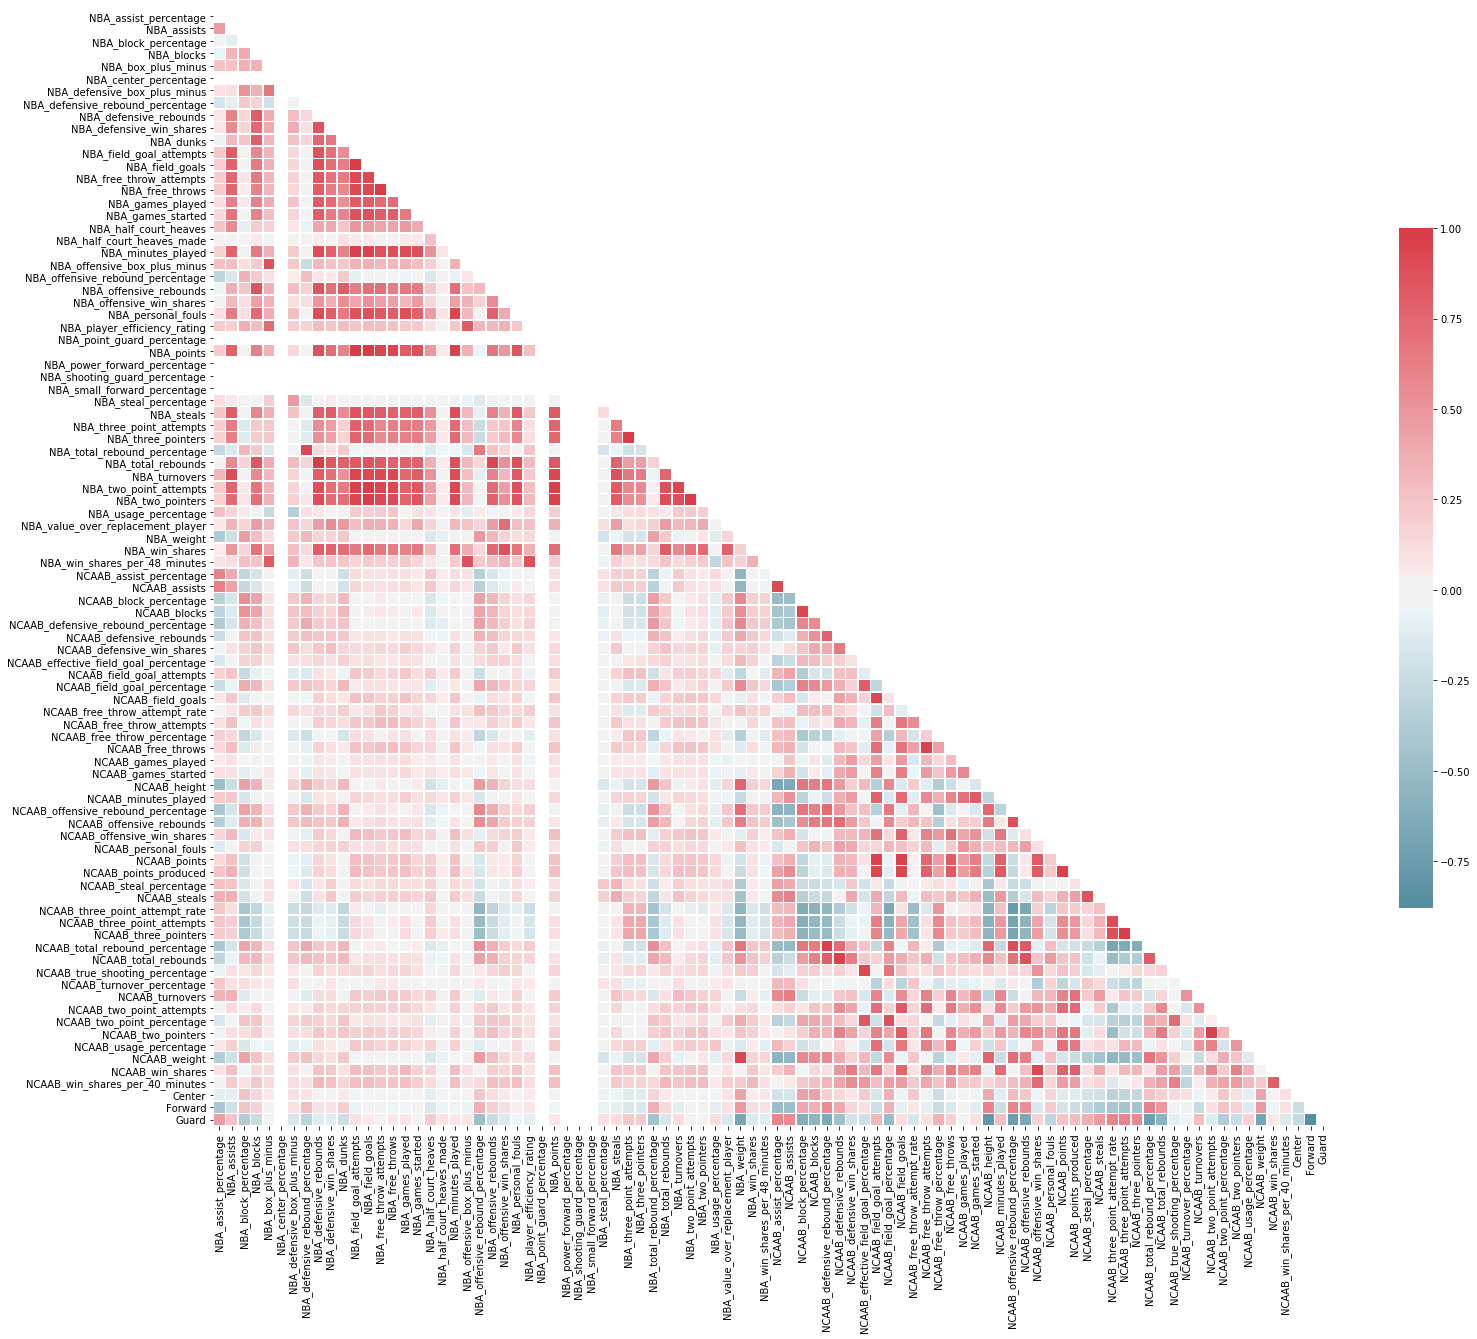

In [37]:
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr, cmap=cmap, mask=mask, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

Wow, quite the graph, but it's tough to really see what's going on. Let's reduce some features that aren't useful/essential towards solving our objective, and take a look at the heatmap again.

In [38]:
# Get the NBA columns and NCAAB columns separately
nba_col = [(num, da_df.columns[num]) for num in range(len(da_df.columns)) if 'NBA' in da_df.columns[num]]
ncaab_col = [(num, da_df.columns[num]) for num in range(len(da_df.columns)) if 'NCAAB' in da_df.columns[num]]

In [39]:
for e in nba_col:
    print(e)

(0, 'NBA_assist_percentage')
(1, 'NBA_assists')
(2, 'NBA_block_percentage')
(3, 'NBA_blocks')
(4, 'NBA_box_plus_minus')
(5, 'NBA_center_percentage')
(6, 'NBA_defensive_box_plus_minus')
(7, 'NBA_defensive_rebound_percentage')
(8, 'NBA_defensive_rebounds')
(9, 'NBA_defensive_win_shares')
(10, 'NBA_dunks')
(11, 'NBA_field_goal_attempts')
(12, 'NBA_field_goals')
(13, 'NBA_free_throw_attempts')
(14, 'NBA_free_throws')
(15, 'NBA_games_played')
(16, 'NBA_games_started')
(17, 'NBA_half_court_heaves')
(18, 'NBA_half_court_heaves_made')
(19, 'NBA_minutes_played')
(20, 'NBA_offensive_box_plus_minus')
(21, 'NBA_offensive_rebound_percentage')
(22, 'NBA_offensive_rebounds')
(23, 'NBA_offensive_win_shares')
(24, 'NBA_personal_fouls')
(25, 'NBA_player_efficiency_rating')
(26, 'NBA_point_guard_percentage')
(27, 'NBA_points')
(28, 'NBA_power_forward_percentage')
(29, 'NBA_shooting_guard_percentage')
(30, 'NBA_small_forward_percentage')
(31, 'NBA_steal_percentage')
(32, 'NBA_steals')
(33, 'NBA_three_poin

In [40]:
for e in ncaab_col:
    print(e)

(45, 'NCAAB_assist_percentage')
(46, 'NCAAB_assists')
(47, 'NCAAB_block_percentage')
(48, 'NCAAB_blocks')
(49, 'NCAAB_defensive_rebound_percentage')
(50, 'NCAAB_defensive_rebounds')
(51, 'NCAAB_defensive_win_shares')
(52, 'NCAAB_effective_field_goal_percentage')
(53, 'NCAAB_field_goal_attempts')
(54, 'NCAAB_field_goal_percentage')
(55, 'NCAAB_field_goals')
(56, 'NCAAB_free_throw_attempt_rate')
(57, 'NCAAB_free_throw_attempts')
(58, 'NCAAB_free_throw_percentage')
(59, 'NCAAB_free_throws')
(60, 'NCAAB_games_played')
(61, 'NCAAB_games_started')
(62, 'NCAAB_height')
(63, 'NCAAB_minutes_played')
(64, 'NCAAB_offensive_rebound_percentage')
(65, 'NCAAB_offensive_rebounds')
(66, 'NCAAB_offensive_win_shares')
(67, 'NCAAB_personal_fouls')
(68, 'NCAAB_points')
(69, 'NCAAB_points_produced')
(70, 'NCAAB_steal_percentage')
(71, 'NCAAB_steals')
(72, 'NCAAB_three_point_attempt_rate')
(73, 'NCAAB_three_point_attempts')
(74, 'NCAAB_three_pointers')
(75, 'NCAAB_total_rebound_percentage')
(76, 'NCAAB_total

Take a look at the different columns above, and see what columns you think might be useful to keep around. It may also may be useful to take a look at which of the columns have the strongest positive/negative correlation with the response variables (what we're predicting: NBA points, rebounds, assists, steals, and blocks). 

In [41]:
# Choose the different columns you might want to include from the features here!

# TODO (remove below)

ncaa_important = [46, 48, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 67, 68, 70, 71, 72, 73, 75, 76, 78, 79, 80, 81, 85]

In [42]:
# These are the 5 key stats we'll be trying to measure for for the NBA players
nba_important = [1, 3, 27, 32, 36]

In [43]:
# Position columns
pos_col = [87, 88, 89]

Now let's take a look at the correlation matrix with our reduced number of features!

In [44]:
clean_reduce = da_df.iloc[:, nba_important + ncaa_important + pos_col] # We'll be using this again later
corr2 = clean_reduce.corr()
corr2.head()

,NBA_assists,NBA_blocks,NBA_points,NBA_steals,NBA_total_rebounds,NCAAB_assists,NCAAB_blocks,NCAAB_field_goal_attempts,NCAAB_field_goal_percentage,NCAAB_field_goals,...,NCAAB_total_rebound_percentage,NCAAB_total_rebounds,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_win_shares,Center,Forward,Guard
NBA_assists,1.000000,0.331511,0.790452,0.802118,0.560391,0.428387,-0.133383,0.240184,-0.058738,0.218316,...,-0.185640,-0.070510,0.111866,0.340135,0.134240,-0.015701,0.273282,-0.091562,-0.211429,0.254768
NBA_blocks,0.331511,1.000000,0.618222,0.587918,0.840788,-0.147857,0.425548,-0.082613,0.312155,0.035274,...,0.330492,0.313051,0.072806,0.015096,0.130799,0.239473,0.137230,0.157211,0.172468,-0.248439
NBA_points,0.790452,0.618222,1.000000,0.836210,0.836836,0.126426,0.020256,0.212945,0.076661,0.247211,...,0.013786,0.085846,-0.002718,0.206632,0.174531,0.095658,0.277343,-0.040790,-0.047599,0.067287
NBA_steals,0.802118,0.587918,0.836210,1.000000,0.776321,0.220473,-0.004717,0.168797,0.007397,0.172391,...,-0.007311,0.080283,0.086207,0.248022,0.142796,0.035216,0.245949,-0.060971,-0.086413,0.115717
NBA_total_rebounds,0.560391,0.840788,0.836836,0.776321,1.000000,-0.038989,0.230742,0.069193,0.248240,0.169743,...,0.276480,0.302707,0.024938,0.111324,0.204643,0.205460,0.250669,0.054563,0.138404,-0.164130


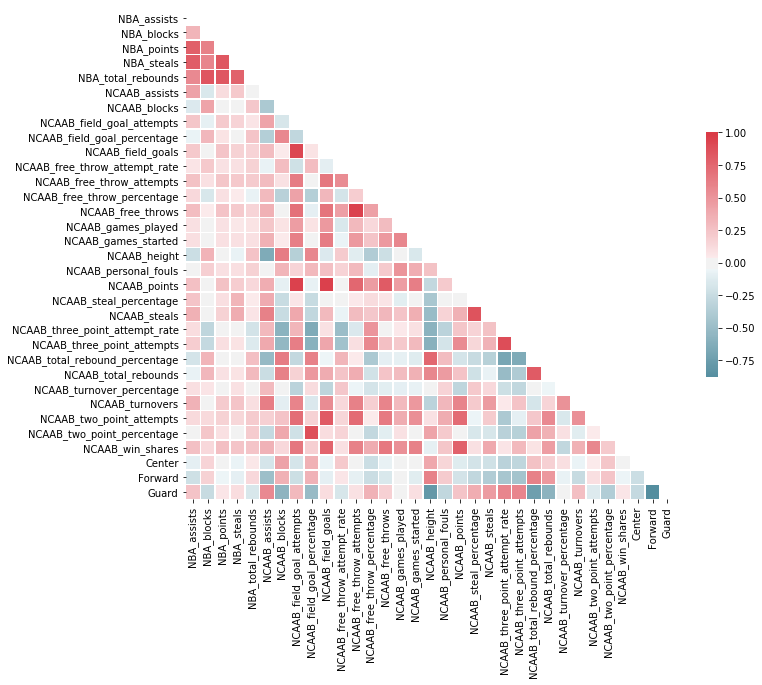

In [45]:
mask2 = np.zeros_like(corr2, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True
cmap2 = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr2, cmap=cmap2, mask=mask2, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

If you wanted to look at just how the different features affect the NBA points, rebounds, assists, steals, and blocks, run the following cell and render a sub-heatmap of the one above.

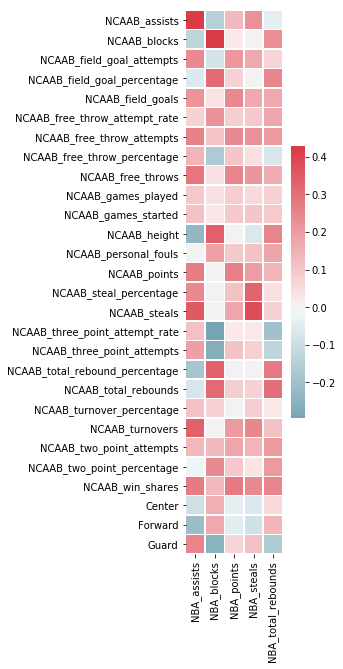

In [46]:
reduced = corr2.iloc[:, 0:5].iloc[5:]
f, ax = plt.subplots(figsize=(3, 10))
sns.heatmap(reduced, cmap=cmap2, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

With these correlations matrices, we'll be able to determine which features are best correlated with each other, even without having any basketball knowledge beforehand!

Take note of these different features with the strongest positive/negative correlation, as they'll be incredibly useful later for modelling.

# Conclusion

**Congrats!** You've finished a hefty section on how to clean our data, analyze it, and extract different key features from it using `Pandas`, data cleaning techniques, `matplotlib`, `seaborn`, and more! For this last part, we'll save what we've been able to do into a `csv` that we'll be able to import into the next Jupyter Notebook to begin our modeling!

In [47]:
# Saves our clean_data dataframe into a csv
final_cleaned = clean_data.iloc[:, ncaa_important + nba_important + pos_col]
final_cleaned.to_csv("data/player_data_final.csv")